# I N T R O D U C T I O N

In any machine learning project, the first thing to do is to fully understand the raw data we have and to manipulate it and fine tune it enough that we have the insights and the information we need to start actually working with it. Exploratory Data Analysis (EDA) is a process of doing so. We take a look at the data we have before rushing into conclusions. This helps identify apparent errors and better understand patterns within the data, detect outliers or find interesting relations among the variables. We will be using that in order to perform an efficient text tokenization.

The second step would then be using a machine learning approach, unsupervised learning in our case, to perform token embedding on the tokens we obtain from the tokenizer function.

# W O R K F L O W

## I. Tokenizer function

Text data in nature is very unstructured and therefore, to be able to analyse it and use it, we use text mining techniques. These techniques shall help us summarize, visualize and get deeply acquainted with the important traits of our data set. We shall use these techniques in our Exploratory Data Analysis process on our way to creating an efficient tokenizer function.

### Importing libraries

In [ ]:
# For interacting with the colab environment
import os

# For reading the csv file
import pandas as pd

### Data Acquisition

To do so, we can add the zip file to google drive and then mount the latter to the colab environment in order to be able to access the file and unzip it.

In [ ]:
# unzipping the file
!unzip /content/drive/MyDrive/documents.csv.zip

Archive:  /content/drive/MyDrive/documents.csv.zip
  inflating: documents.csv           
  inflating: __MACOSX/._documents.csv  


Now that the file is unzipped, the extracted files will be added to the colab environment and will appear in the files list.

 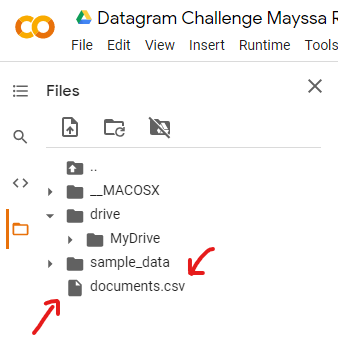

We then copy the path to that file (documents.csv) by right clicking on it and choosing the command "Copy path".

After that, we paste the link as shown in the code below in order to read the data.

In [ ]:
# Reading the data
raw_data = pd.read_csv("/content/documents.csv") 

### Getting a first glance at our data

In [ ]:
raw_data

,id,doc
0,320089,La gamme ULTIMATE REPAIR comble les pertes en ...
1,320719,L'Anti-Calcaire Antikal Plus élimine les trace...
2,320803,Brioche nature 400g.
3,321509,On ne dîne plus on soupe ! Simple et Gourmand ...
4,321619,"Confipote, la plus décomplexée des confitures ..."
...,...,...
243518,2892200042,"Verrines garnies de tomates, de courgettes, de..."
243519,2892205932,NaN
243520,2892230985,NaN
243521,2892231399,"Verrines garnies de surimi, de crevettes cuite..."


In [ ]:
raw_data.info

<bound method DataFrame.info of                 id                                                doc
0           320089  La gamme ULTIMATE REPAIR comble les pertes en ...
1           320719  L'Anti-Calcaire Antikal Plus élimine les trace...
2           320803                               Brioche nature 400g.
3           321509  On ne dîne plus on soupe ! Simple et Gourmand ...
4           321619  Confipote, la plus décomplexée des confitures ...
...            ...                                                ...
243518  2892200042  Verrines garnies de tomates, de courgettes, de...
243519  2892205932                                                NaN
243520  2892230985                                                NaN
243521  2892231399  Verrines garnies de surimi, de crevettes cuite...
243522  2892238736                                                NaN

[243523 rows x 2 columns]>

In [ ]:
raw_data.describe()

,id
count,2.435230e+05
mean,2.479304e+08
std,6.015039e+08
min,3.200890e+05
25%,1.218775e+07
50%,2.124742e+07
75%,2.488630e+07
max,2.892239e+09


In [ ]:
print("Shape of data is : ",raw_data.shape)

Shape of data is :  (243523, 2)


Note: we can directly download the data into the colab environment without having to download it on our laptop or mount it on our drive using the command: 

!wget https://... (download link)

### Data Cleaning

Before I begin working with my data, I always prefer to make a copy of it in the process in order to always have that first raw version of data to come back to if I ever need to. In this challenge, the copy of the cleaned data is under the name: clean_data.

In [ ]:
# Checking how many NaN values we have
raw_data.isnull().sum(axis = 0)

id         0
doc    34842
dtype: int64

We notice that we have 34842 NaN values out of 243523 total values which is around 14%. We will want to, of course, get rid of those values in order to clean our data and leave only what we need.

In [ ]:
#removing the NaN values
clean_data = raw_data
clean_data.dropna(inplace = True)
clean_data

,id,doc
0,320089,La gamme ULTIMATE REPAIR comble les pertes en ...
1,320719,L'Anti-Calcaire Antikal Plus élimine les trace...
2,320803,Brioche nature 400g.
3,321509,On ne dîne plus on soupe ! Simple et Gourmand ...
4,321619,"Confipote, la plus décomplexée des confitures ..."
...,...,...
243416,2886941148,"Verrines garnies de pulpe dâavocat, de tomat..."
243421,2886941324,"A l'apÃ©ritif ou en en raclette, choisissez le..."
243513,2886949452,Cubanisto est une biÃ¨re Â« tendance Â» aromat...
243518,2892200042,"Verrines garnies de tomates, de courgettes, de..."


In [ ]:
# Checking the transformation made
# we should now see that the number of NaN values in the doc column is zero instead of 34842
clean_data.isnull().sum()

id     0
doc    0
dtype: int64

In [ ]:
# knowing how many rows we have is great but affecting them to a variable is always a good idea!
num_rows = clean_data.shape[0]
num_rows

208681

In [ ]:
""" For better visualization"""
# Creating a list, desc_list, of the text we have (the product descriptions)
desc_list = []
for index,text in enumerate(clean_data['doc']):
  desc_list.append(text)
print(len(desc_list))

208681


In [ ]:
# Verifying if the length of desc_list length is equal to the number of rows we have
num_rows == len(desc_list)

True

In [ ]:
# Visualizing desc_list by printing some values
for x in range(15):
  print(desc_list[x])

La gamme ULTIMATE REPAIR comble les pertes en kératine, répare de façon ciblée les zones très abîmées de la fibre capillaire et apporte résistance et brillance aux cheveux. Ce shampooing est conçu pour laver les cheveux en douceur. Sa formule, composée de 89 % d’ingrédients d’origine naturelle *, est enrichie en KÉRATINE LIQUIDE, protéine protectrice, et en PERLE NOIRE, riche en oligo-éléments. Les 11 % restants participent principalement à la sensorialité et la bonne conservation du produit. Les formules GLISS, aux ACTIFS CAPILLAIRES RECONNUS, réparent les zones abîmées et répondent aux besoins spécifiques des cheveux pour les sublimer.. Shampooing
L'Anti-Calcaire Antikal Plus élimine les traces d'eau et dissout le calcaire. En plus, sa formule épaisse lui permet d'adhérer plus longtemps sur les surfaces verticales, pour un nettoyage en profondeur des résidus de savon et autres types de saleté. L'anti-calcaire Antikal respecte vos surfaces et aide à éviter les traces d'eau et à préven

We notice, from a first glance at the text, some changes that need to be done to the text such as some characters and digits that need to be removed for example.

This is the stage at which we will use text mining techniques in order to efficiently conduct the EDA process for the sake of a well structured and systematic tokenizer function.

### Making the tokenizer function

In Natural Language Processing (NLP), the first step is Tokenization. Applying tokenization is representing words in a way that a computer can process them. So we basically break strings into tokens which are the units or structures we will use for tokenization.

In [ ]:
# Importing the libraries we need for tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The following tokenizer function takes in as input:
1. The dataframe
2. The name of the original dataframe column we are concerned with doing tokenization on
3. The name of the new dataframe column that will contain the clean text

In [ ]:
# Creating the column clean_column in the dataframe (for comparison and raw data purposes)
clean_data['clean_doc'] = clean_data['doc']

In [ ]:
def tokenizer (df, clean_column):

  # Lowercasing the text
  df[clean_column] = df[clean_column].apply(lambda x: x.lower())
  
  # Removing digits and words containing digits
  import re
  df[clean_column] = df[clean_column].apply(lambda x: re.sub('\w*\d\w*','', x))
  
  # Removing punctuations
  import string
  df[clean_column] = df[clean_column].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
  
  # Removing extra spaces
  df[clean_column] = df[clean_column].apply(lambda x: re.sub(' +',' ',x))

  # Creating a list of the text we have (the product descriptins) in order to be able to manipulate it more directly
  clean_list = []
  for index,text in enumerate(df[clean_column]):
    clean_list.append(text)

  # Removing non-alphanumeric characters (and keeping the spaces as they are)
  for x in range(len(clean_list)):
    clean_list[x] = ''.join(ch for ch in clean_list[x] if ch.isalnum() or ch == " " )

  # Turn the list of clean text (clean_list) into a string to be able to apply word_tokenize function
  clean_str = ""
  for x in clean_list: 
    clean_str += x
  
  # Finally getting our tokens (splitting the text into words)
  tokens = word_tokenize(clean_str)

  return tokens


In [ ]:
# Applying our tokenizer function on this dataframe
tokens = tokenizer(clean_data, 'clean_doc')
print(type(tokens))
n_tokens = len(tokens)
print(n_tokens)

<class 'list'>
5616424


Note: While trying different methods for applying the operation of "Removing non-alphanumeric characters", I noticed that the traditional way of doing it (changing the dataframe content and then extracting the text) is a very expensive method in terms of time, around 14 times more time consuming than the method that i have used.

In fact, the way i did it will apply the changes on an extracted list from the dataframe and not on the entire one. It takes around 7 minutes and a half to remove non-alphanumeric characters from the whole dataframe, whereas the method that i used (in which we extract a list and then extract the tokens from it) only takes 36 seconds.

And this is very logical as we have more than 208 thousand rows in our dataframe so changing them all will definitely take a few minutes.

## II.Token embedding

Token embeddings are the vocabulary IDs for each of the tokens. At the token embedding stage, we will send each token we have obtained from the tokenizer fuction to the token embedding layer in order to convert each one into a vector form and hereby obtain our embedding matrix.

The vectors we will obtain are word embeddings of which the values are trainable parameters. These values are weights that the model learns and that shall be enough for us to be sure that they will be more efficient that one-hot encoding or manual encoding.

.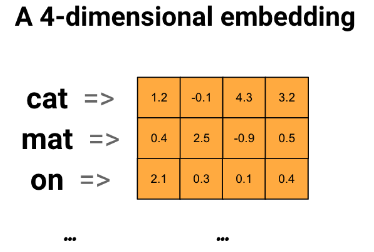

Above is a 4-dimension word embedding example where each word (token) is represented as a 4-dimension vector containing weights determined by a given model.

JUST MAKE A SIMPLE TRAIN TEST SPLIT OPERATION, VECTORIZATION, THEN EMBEDDING (AS SIMPLE AND CLEAR AS YOU CAN)

### Importing libraries

In [ ]:
import io
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). 
 
 It is common to see word embeddings that are 8-dimensional (for small datasets), up to 1024-dimensions when working with large datasets. A higher dimensional embedding can capture fine-grained relationships between words, but takes more data to learn.

When given a batch of sequences as input, an embedding layer returns a 3D floating point tensor, of shape (samples, sequence_length, embedding_dimensionality).

In [ ]:
# Vocabulary size and number of words in a sequence.
vocab_size = clean_data.shape[1]
sequence_length = 0
for token in tokens:
  for ch in token:
    sequence_length +=1
print(sequence_length)
print(vocab_size)

31828159
3


In [ ]:
# Making the vectorize layer that will prepare the input for the embedding layer
vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)
vectorize_layer.adapt(tokens)

In [ ]:
# Manually dividing the data into a testing and a trainig set
train_tokens = []
test_tokens = []
for i in range(n_tokens):
  if i < int(n_tokens*0.3):
    test_tokens.append(tokens[i])
  else :
    train_tokens.append(tokens[i])

print(len(test_tokens))
print(len(train_tokens))

1684927
3931497


In [ ]:
# Manually dividing the training data to a training and a validation data
val_tokens = []
l = len(train_tokens)
for i in range(l):
  if i < int(l*0.5):
    val_tokens.append(train_tokens[i])
    train_tokens.remove(train_tokens[i])

print(len(val_tokens))
print(len(train_tokens))

In [ ]:
# Making our model
embedding_dim=16

model = Sequential([
  # transform strings into vocabulary indices
  vectorize_layer,
  # Creating the vectors (adding a dimension to the output array) => output shape = (batch, sequence, embedding)
  Embedding(vocab_size, embedding_dim, name="embedding"),
  # To turn an input of variable length into a fixed-length output by averaging over the sequence dimension
  GlobalAveragePooling1D(),
  # Piping our output through a fully-connected Dense layer of 16 hidden units
  Dense(16, activation='relu'),
  # Connecting the last layer with a single output node
  Dense(1)])

In [ ]:
model.summary()

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
model.fit(
    train_tokens,
    validation_data=val_tokens,
    epochs=15,
    callbacks=[tensorboard_callback])

In [ ]:
# Retrieving the word embeddings
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [ ]:
print(vocab.shape)